In [1]:
import sys, os

%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
from hydra import compose, initialize
from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [51]:
data = BinaryIV.generate_data_rolling_ate(100)
binaryIV = BinaryIV('IV Dag', data)
ATE_algs = ['ATE_entropybounds-0.80', 'ATE_entropybounds-0.20', 'ATE_entropybounds-0.10', 'ATE_entropybounds-trueTheta']
PNS_algs = ['PNS_entropybounds-0.80', 'PNS_entropybounds-0.20', 'PNS_entropybounds-0.10', 'PNS_entropybounds-trueTheta']
algs = ATE_algs + PNS_algs

runtimes = binaryIV.run(algs)
binaryIV.data

Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 7.99 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 11.59 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 11.59 seconds.
Running ATE_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


ATE_entropybounds-trueTheta completed in 11.66 seconds.
Running PNS_entropybounds-0.80...
PNS_entropybounds-0.80 completed in 3.74 seconds.
Running PNS_entropybounds-0.20...
PNS_entropybounds-0.20 completed in 6.08 seconds.
Running PNS_entropybounds-0.10...
PNS_entropybounds-0.10 completed in 7.35 seconds.
Running PNS_entropybounds-trueTheta...


C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\cvxpy\problems\problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


PNS_entropybounds-trueTheta completed in 10.58 seconds.
Total runtime: 70.60 seconds.


,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y,squasher_X_name,squasher_Y_name,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,PNS_entropybounds-0.80_bound_lower,PNS_entropybounds-0.80_bound_upper,PNS_entropybounds-0.80_bound_valid,PNS_entropybounds-0.80_bound_width,PNS_entropybounds-0.80_bound_failed,PNS_entropybounds-0.20_bound_lower,PNS_entropybounds-0.20_bound_upper,PNS_entropybounds-0.20_bound_valid,PNS_entropybounds-0.20_bound_width,PNS_entropybounds-0.20_bound_failed,PNS_entropybounds-0.10_bound_lower,PNS_entropybounds-0.10_bound_upper,PNS_entropybounds-0.10_bound_valid,PNS_entropybounds-0.10_bound_width,PNS_entropybounds-0.10_bound_failed,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed
0,244012,0,0,-0.727137,-0.020614,-5.00000,-1.560111,-0.230013,0.001560,0.002364,0.232377,0.783336,0.032459,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.204325,0.680077,0.984990,0.599739,0.465414,0.485169,probit,sigmoid,-0.713996,0.249377,True,0.963373,False,-0.694016,-0.095022,True,0.598994,False,-0.649027,-0.236648,False,0.412380,False,-0.713997,0.211276,True,0.925273,False,2.932541e-09,0.853362,True,0.853362,False,2.931280e-09,0.248195,True,0.248195,False,7.154216e-10,0.124111,True,0.124111,False,5.925606e-09,0.812411,True,0.812411,False
1,244775,0,0,-1.158049,0.773503,-4.89899,0.252127,-0.534656,0.004015,0.008857,0.543514,0.705084,0.990692,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...",0.106274,0.888502,0.888502,0.968563,0.675094,1.219486,probit,sigmoid,-0.651000,0.338010,True,0.989010,False,-0.644966,-0.028893,True,0.616073,False,-0.612130,-0.194682,True,0.417448,False,-0.650991,0.349000,True,0.999991,False,1.236391e-07,0.606003,True,0.606002,False,3.075888e-07,0.409633,True,0.409632,False,2.660710e-06,0.216366,True,0.216363,False,0.000000e+00,0.606001,True,0.606001,False
2,956357,0,0,-1.364941,-0.863209,-4.79798,-1.447228,-0.162511,0.000011,0.000020,0.162531,0.770827,0.322681,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.926720,0.804876,0.684433,0.535083,0.075172,0.430572,tanh_scaled,tanh_scaled,-0.590997,0.409001,True,0.999999,False,-0.590998,0.073085,True,0.664082,False,-0.578964,-0.134273,True,0.444691,False,-0.590997,0.409001,True,0.999998,False,0.000000e+00,0.878000,True,0.878000,False,0.000000e+00,0.690161,True,0.690161,False,5.700140e-08,0.345088,True,0.345088,False,0.000000e+00,0.878000,True,0.878000,False
3,16820,0,0,-1.413789,-1.298690,-4.69697,0.877171,-0.718674,0.000009,0.000048,0.718721,0.705849,0.672006,"[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",

In [ ]:
results = pd.read_pickle('./results/binaryIV/06_06/12/results.pkl')
results = binaryIV.data
results

,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y,squasher_X_name,squasher_Y_name,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed,ATE_entropybounds-trueTheta_bound_lower,ATE_entropybounds-trueTheta_bound_upper,ATE_entropybounds-trueTheta_bound_valid,ATE_entropybounds-trueTheta_bound_width,ATE_entropybounds-trueTheta_bound_failed,PNS_entropybounds-0.80_bound_lower,PNS_entropybounds-0.80_bound_upper,PNS_entropybounds-0.80_bound_valid,PNS_entropybounds-0.80_bound_width,PNS_entropybounds-0.80_bound_failed,PNS_entropybounds-0.20_bound_lower,PNS_entropybounds-0.20_bound_upper,PNS_entropybounds-0.20_bound_valid,PNS_entropybounds-0.20_bound_width,PNS_entropybounds-0.20_bound_failed,PNS_entropybounds-0.10_bound_lower,PNS_entropybounds-0.10_bound_upper,PNS_entropybounds-0.10_bound_valid,PNS_entropybounds-0.10_bound_width,PNS_entropybounds-0.10_bound_failed,PNS_entropybounds-trueTheta_bound_lower,PNS_entropybounds-trueTheta_bound_upper,PNS_entropybounds-trueTheta_bound_valid,PNS_entropybounds-trueTheta_bound_width,PNS_entropybounds-trueTheta_bound_failed
0,244012,0,0,-0.727137,-0.020614,-5.00000,-1.560111,-0.230013,0.001560,0.002364,0.232377,0.783336,0.032459,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.204325,0.680077,0.984990,0.599739,0.465414,0.485169,probit,sigmoid,-0.713996,0.249377,True,0.963373,False,-0.694016,-0.095022,True,0.598994,False,-0.649027,-0.236648,False,0.412380,False,-0.713997,0.211276,True,0.925273,False,2.932541e-09,0.853362,True,0.853362,False,2.931280e-09,0.248195,True,0.248195,False,7.154216e-10,0.124111,True,0.124111,False,5.925606e-09,0.812411,True,0.812411,False
1,244775,0,0,-1.158049,0.773503,-4.89899,0.252127,-0.534656,0.004015,0.008857,0.543514,0.705084,0.990692,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, ...",0.106274,0.888502,0.888502,0.968563,0.675094,1.219486,probit,sigmoid,-0.651000,0.338010,True,0.989010,False,-0.644966,-0.028893,True,0.616073,False,-0.612130,-0.194682,True,0.417448,False,-0.650991,0.349000,True,0.999991,False,1.236391e-07,0.606003,True,0.606002,False,3.075888e-07,0.409633,True,0.409632,False,2.660710e-06,0.216366,True,0.216363,False,0.000000e+00,0.606001,True,0.606001,False
2,956357,0,0,-1.364941,-0.863209,-4.79798,-1.447228,-0.162511,0.000011,0.000020,0.162531,0.770827,0.322681,"[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, ...","[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.926720,0.804876,0.684433,0.535083,0.075172,0.430572,tanh_scaled,tanh_scaled,-0.590997,0.409001,True,0.999999,False,-0.590998,0.073085,True,0.664082,False,-0.578964,-0.134273,True,0.444691,False,-0.590997,0.409001,True,0.999998,False,0.000000e+00,0.878000,True,0.878000,False,0.000000e+00,0.690161,True,0.690161,False,5.700140e-08,0.345088,True,0.345088,False,0.000000e+00,0.878000,True,0.878000,False
3,16820,0,0,-1.413789,-1.298690,-4.69697,0.877171,-0.718674,0.000009,0.000048,0.718721,0.705849,0.672006,"[1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, ...",

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
     ATE_entropybounds-0.10          0.00             9.00          0.5965      0.7228          3.05
     ATE_entropybounds-0.20          0.00             4.00          0.7781      0.8270          4.87
ATE_entropybounds-trueTheta          0.00             5.00          0.9250      0.9788          4.55
     ATE_entropybounds-0.80          0.00             4.00          0.9944      1.0346          4.63


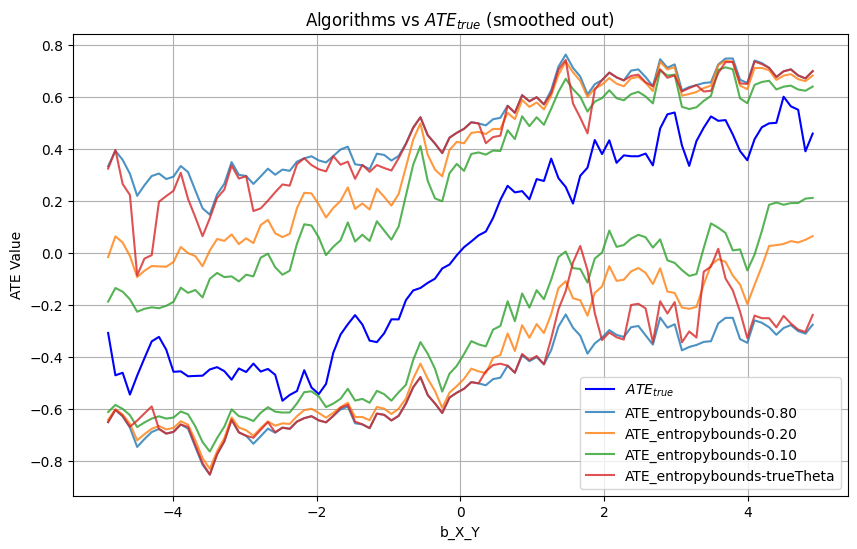

In [ ]:
#ATE Evaluation
PlottingUtil.print_bound_statistics_table(results, ATE_algs, 'ATE')
PlottingUtil.plot_smoothed_query_vs_bounds(results, 'ATE', ATE_algs, 3)

                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
     PNS_entropybounds-0.10          0.00             1.00          0.5170      0.5218          5.13
     PNS_entropybounds-0.20          0.00             1.00          0.5911      0.5952          2.28
PNS_entropybounds-trueTheta          0.00             2.00          0.6881      0.6943          1.13
     PNS_entropybounds-0.80          0.00             1.00          0.7215      0.7243          2.26


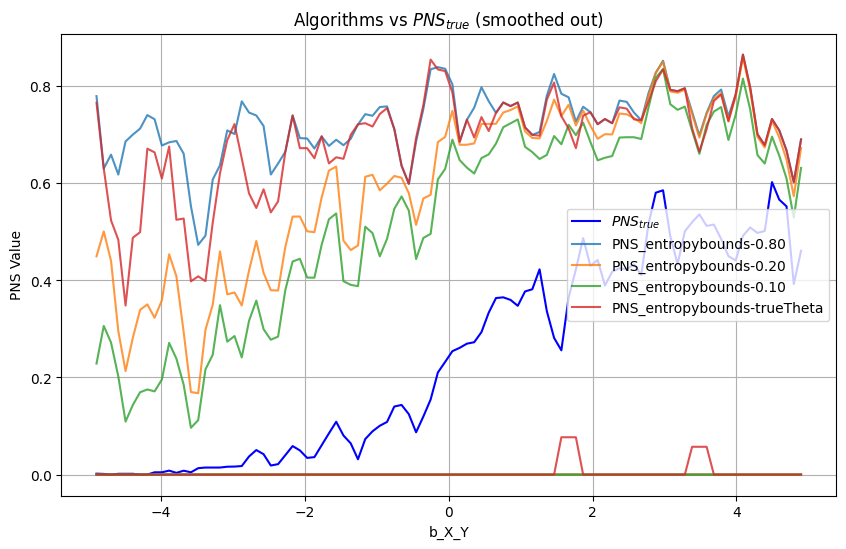

In [55]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, PNS_algs, 'PNS')
PlottingUtil.plot_smoothed_query_vs_bounds(results, 'PNS', PNS_algs, 3)

In [10]:
# randomize b_X_Y as well
data = []
for i in range(2000):
    sim = BinaryIV._simulate_deterministic_data(uniform_confounder_entropy=True)
    data.append(sim)
data = pd.DataFrame(data)
binaryIV = BinaryIV('IV Dag', data)

In [11]:
data['entropy_U'].describe()

count    2000.000000
mean        0.505965
std         0.295366
min        -0.000000
25%         0.251388
50%         0.517753
75%         0.770973
max         0.999988
Name: entropy_U, dtype: float64

## Randomized entropy
* entropy(U) is randomized
* theta is set to true UB(entropy(U))


In [ ]:
binaryIV.run(['ATE_entropybounds-trueTheta', 'ATE_tianpearl'])
binaryIV.run(['PNS_entropybounds-trueTheta', 'PNS_tianpearl'])
results = binaryIV.data


Running PNS_nonpara...
PNS_nonpara completed in 2.24 seconds.
Total runtime: 2.24 seconds.


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
ATE_entropybounds-trueTheta          0.00             4.95          0.9291      0.9822          5.65
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1901
Model:                            GLM   Df Residuals:                     1898
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -225.98
Date:                Tue, 10 Jun 2025   Deviance:                       55.428
Time:                        16:07:54   Pearson chi2:                     66.1
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1671
Covariance Type:            nonrobust                                         
        

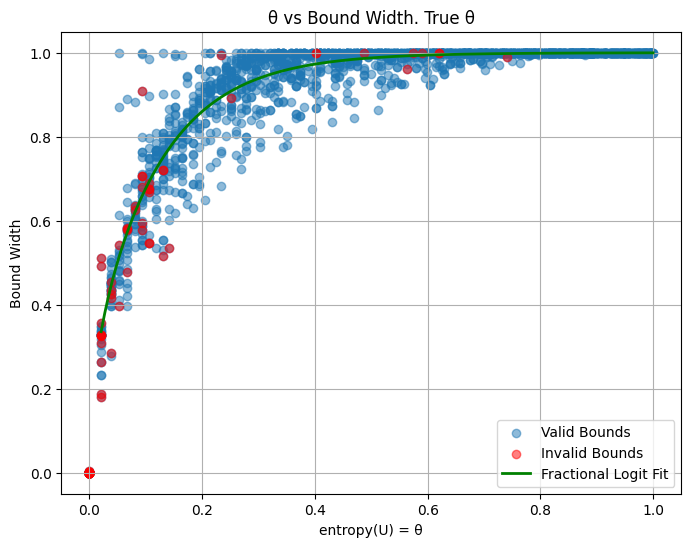

In [ ]:
PlottingUtil.print_bound_statistics_table(results, ['ATE_entropybounds-trueTheta'], 'ATE')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'ATE_entropybounds-trueTheta')


                  Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
                PNS_nonpara          0.00             5.95          0.2618      0.3057          3.14
PNS_entropybounds-trueTheta          0.00             0.05          0.6808      0.6810          5.42
                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 1999
Model:                            GLM   Df Residuals:                     1996
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -840.66
Date:                Tue, 10 Jun 2025   Deviance:                       165.74
Time:                        16:50:03   Pearson chi2:                     163.
No. Iterations:                     4   Pseudo R-squ. (CS):      

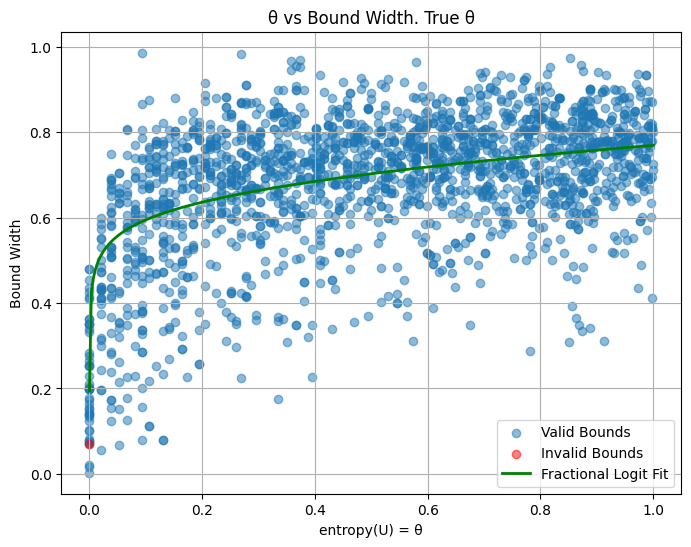

In [18]:
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-trueTheta', 'PNS_nonpara'], 'PNS')
PlottingUtil.plot_trueEntropyUB_vs_bound_width(results, 'PNS_entropybounds-trueTheta')


## Randomized Theta

In [84]:
data
binaryIV.run(['PNS_entropybounds-randomTheta'])
results_randomTheta = binaryIV.data

Running PNS_entropybounds-randomTheta...


d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:65: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_width"] = bounds_width
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\entropybounds.py:66: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.at[idx, f"{query}_entropybounds-{theta_rounded}_bound_failed"] = failed
d:\TUM Workspace\Thesis Workspace\causal-boun

PNS_entropybounds-randomTheta completed in 85.37 seconds.
Total runtime: 85.40 seconds.


In [85]:
#PNS Evaluation
PlottingUtil.print_bound_statistics_table(results, ['PNS_entropybounds-randomTheta'], 'PNS')


                    Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
PNS_entropybounds-randomTheta          0.00             0.00          0.6866      0.6866           N/A


                 Generalized Linear Model Regression Results                  
Dep. Variable:        bound_width_tmp   No. Observations:                 2000
Model:                            GLM   Df Residuals:                     1997
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -844.31
Date:                Tue, 10 Jun 2025   Deviance:                       146.53
Time:                        15:10:07   Pearson chi2:                     144.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01931
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2553      0.294      4.266      0.0

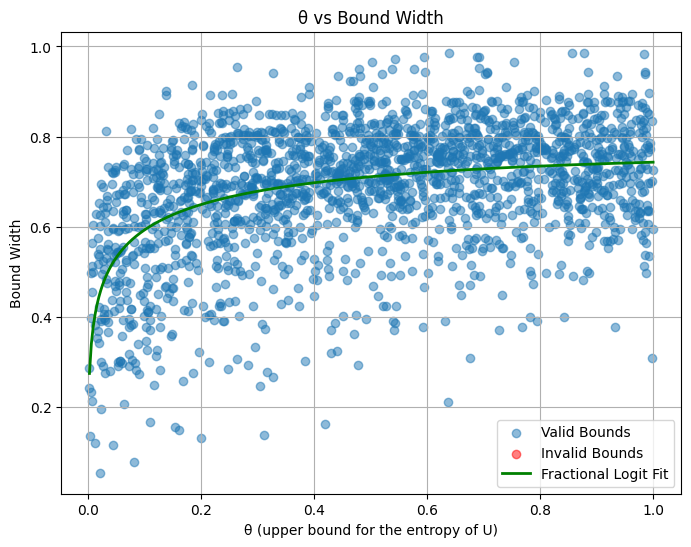

In [93]:
PlottingUtil.randomized_entropyUB_vs_bound_width(results, 'PNS_entropybounds-randomTheta')